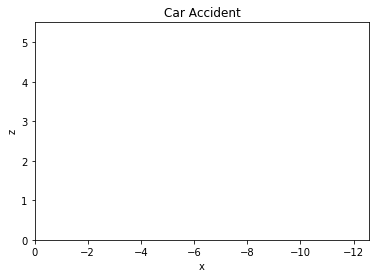

NameError: name 'parabole' is not defined

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import HTML

from bokeh.io import push_notebook, show, output_notebook
from bokeh.plotting import figure
from bokeh.models import Arrow, OpenHead, NormalHead, VeeHead

v_0=5
a=-5.2
d=15
t = np.linspace(0,10,1000) # define time interval
v = a*t + v_0
x = 0.5*a*t**2 +v_0*t-d
plt.plot(v,x)
plt.axis([0, np.max(x), 0, np.max(v)+0.5])
plt.xlabel('x')
plt.ylabel('z')
plt.title('Car Accident')
plt.axes().set_aspect('auto')
plt.show()
    
    
interact(parabole, v_0=(0,50,1))  ;  # afficher les curseurs et les lier aux graphes


In [6]:
# 
g=9.81
L = 60 # Longueur des traces de freinage
d = 15 # Distance entre le début des traces de freinage et le passage piéton
h = 1 # Hauteur des phares de la voiture
a = 5.2 # décélération maximale de la voiture


g=9.81
# Détermination de v_0
x_0= -d
v_0=v_0
x_f= L-d
v_f=0

def vitesseinitiale (v_0,):
    a1=0
    b1=v_0
    a2=-15
    b2=v_0
    a3=L-d
    b3=0
    t = np.linspace(0,10,1000) # define time interval
    v = -a*t + v_0
    x = -0.5*a*t**2 + v_0*t-d
    
    passage1 = np.linspace(0,4,1000)
    passageb = 0*passage1
    passageh = v_0*passage1 
    AXEy= 0*np.linspace(0,50,1000)
    AXEx= np.linspace(-15,50,1000)
 
    
    plt.plot(x,v)
    plt.axis([-20, np.max(x)+10, 0, np.max(v)+10])
    plt.plot([a1], [b1], 'ro')
    plt.plot([a2], [b2],'ro')  
    plt.plot([a3], [b3],'ro')  # point max atteint par la voiture (distance de freinage de 60m)
    plt.plot(passage1,passageb,'ro',linewidth=8)  # x,y    Tracé du passage piéton
    plt.plot(passageb,passageh,'-')        # Tracé du passage piéton
    plt.plot(AXEx,AXEy,'k',linewidth = 3)
    plt.plot(AXEy-15,AXEx,'k',linewidth = 2)
    #plt.axis([0, np.max(sx), 0, np.max(sy)])  # change the scale of axes
    plt.xlabel('x')
    plt.ylabel('v')
    plt.title('Car Accident')
    plt.axes().set_aspect('auto')
    
    plt.show()
        
        
interact(vitesseinitiale, v_0=(0,50,1))  ;





interactive(children=(IntSlider(value=25, description='v_0', max=50), Output()), _dom_classes=('widget-interac…

In [17]:


g=9.81
L = 60 # Longueur des traces de freinage
d = 15 # Distance entre le début des traces de freinage et le passage piéton
h = 1 # Hauteur des phares de la voiture
a = 5.2 # décélération maximale de la voiture


g=9.81
# Détermination de v_0
x_0= -d
x_f= L-d
v_f=0

def positioncollision (x_c,):
    

 
    # Position x_c
    
    v_0= 25 # issu de la simulation précédente
    a1=0
    b1=v_0
    a2=-15
    b2=v_0
    a3=L-d
    b3=0

    t = np.linspace(0,10,1000) # define time interval
    v = -a*t + v_0
    x = -0.5*a*t**2 + v_0*t-d 
    
    A = -v_0+a*((2*h)/(g))**(0.5)
    B = (v_0-a*((2*h)/g)**(0.5))**2
    C = -2*a* (2*d - v_0*(2*h/g)**(0.5))
    D = -a
    
    t_c= (A+ (B +C)**(0.5))/D 
    
    #v_0= (x_c + d + 0.5*a*t_c**2 )/t_c 
    
    v_c= -a*t_c + v_0
    
   # v1=v_c
   # x1=v_c*t+x_c
    v1 = -a*t + v_0
    x1 = -0.5*a*t**2 + v_0*t-d +x_c
    
      
    
    AXEy= 0*np.linspace(0,50,1000)
    AXEx= np.linspace(-15,50,1000)
    
    #Tracé du passage piéton   
    passage1 = np.linspace(-2,2,1000)
    passageb = 0*passage1
    passageh = v_0*passage1    
    plt.plot(passage1,passageb,'ro',linewidth=8)
    plt.plot(passageb,passageh,'-')  
    
    
    plt.plot(x,v,'g') # courbe réelle de la vitesse de la voiture
    plt.plot(x1,v1)
    plt.plot([x_c],[v_c],'k*')   # impact de la collision avec les données de l'exo
    plt.axis([-20, np.max(x)+10, 0, np.max(v)+10])
    plt.plot([a1], [b1], 'ro')
    plt.plot([a2], [b2],'ro')  
    plt.plot([a3], [b3],'ro')  # point max atteint par la voiture

    plt.plot(AXEx,AXEy,'k',linewidth = 3)
    plt.plot(AXEy-15,AXEx,'k',linewidth = 2)
    #plt.axis([0, np.max(sx), 0, np.max(sy)])  # change the scale of axes
    plt.xlabel('x')
    plt.ylabel('v')
    plt.title('Car Accident')
    plt.axes().set_aspect('equal')
    
    plt.show()
        
interact(positioncollision, x_c=(-10,50,1))  ;

# Temps de collision

# Débris des phares



interactive(children=(IntSlider(value=20, description='x_c', max=50, min=-10), Output()), _dom_classes=('widge…